Sequences loaded from FASTA file:
ID: seq1, Sequence: ATGCGTACGTA
ID: seq2, Sequence: AGTCAGTCAGT
ID: seq3, Sequence: GCGTACGATACG
GC content of seq1: 45.45%
GC content of seq2: 45.45%
GC content of seq3: 58.33%


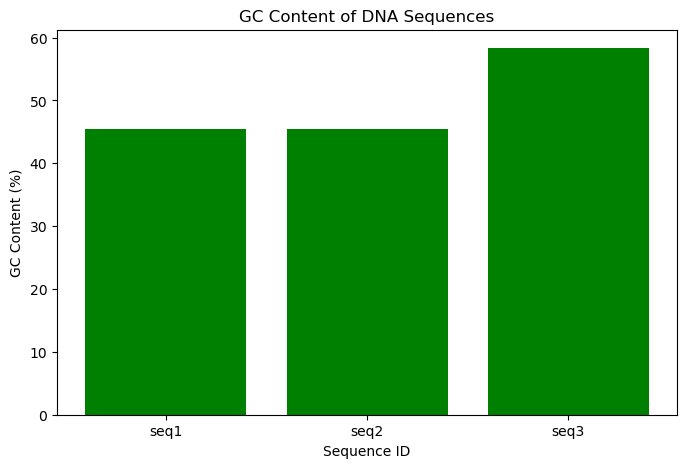

Subsequence 'ATGC' found in seq1
Subsequence 'ATGC' not found in seq2
Subsequence 'ATGC' not found in seq3


In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt

# Cell 2: Reading biological sequence data from a FASTA file
# For this example, we will read a simple FASTA file that contains DNA sequences

# Sample FASTA data (for demonstration purposes)
fasta_data = """>seq1
ATGCGTACGTA
>seq2
AGTCAGTCAGT
>seq3
GCGTACGATACG
"""

# Writing the sample data to a file (this would typically be a file on disk)
with open("example_sequences.fasta", "w") as file:
    file.write(fasta_data)

# Reading the sequences using Biopython's SeqIO
sequences = list(SeqIO.parse("example_sequences.fasta", "fasta"))
print("Sequences loaded from FASTA file:")

for seq in sequences:
    print(f"ID: {seq.id}, Sequence: {seq.seq}")

# Cell 3: Analyzing the sequences
# Example: Finding GC content of each sequence

def calculate_gc_content(seq):
    gc_count = sum(1 for base in seq if base in "GC")
    return gc_count / len(seq) * 100

# Calculate GC content for each sequence
gc_contents = [calculate_gc_content(seq.seq) for seq in sequences]
for seq, gc in zip(sequences, gc_contents):
    print(f"GC content of {seq.id}: {gc:.2f}%")

# Cell 4: Visualizing the GC content
plt.figure(figsize=(8, 5))
plt.bar([seq.id for seq in sequences], gc_contents, color='green')
plt.xlabel('Sequence ID')
plt.ylabel('GC Content (%)')
plt.title('GC Content of DNA Sequences')
plt.show()

# Cell 5: Working with sequence data in a DataFrame (using pandas)

# Example: Create a DataFrame to store sequence IDs and GC contents
df = pd.DataFrame({
    'Sequence ID': [seq.id for seq in sequences],
    'GC Content (%)': gc_contents
})

# Display the DataFrame
df.head()

# Cell 6: Perform a basic search for a subsequence
search_subsequence = "ATGC"

# Search for the subsequence in each sequence
for seq in sequences:
    if search_subsequence in str(seq.seq):
        print(f"Subsequence '{search_subsequence}' found in {seq.id}")
    else:
        print(f"Subsequence '{search_subsequence}' not found in {seq.id}")
